In [14]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[343]
sample = sample[:2500]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_peaks_loc=True)
measurement.set_agg_beat()
ppg_sig = measurement['ppg']

In [51]:
from funcs import get_figs_for_thesis_periodic

prefix = "ppg_"
figs = get_figs_for_thesis_periodic(ppg_sig, prefix)

for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf")

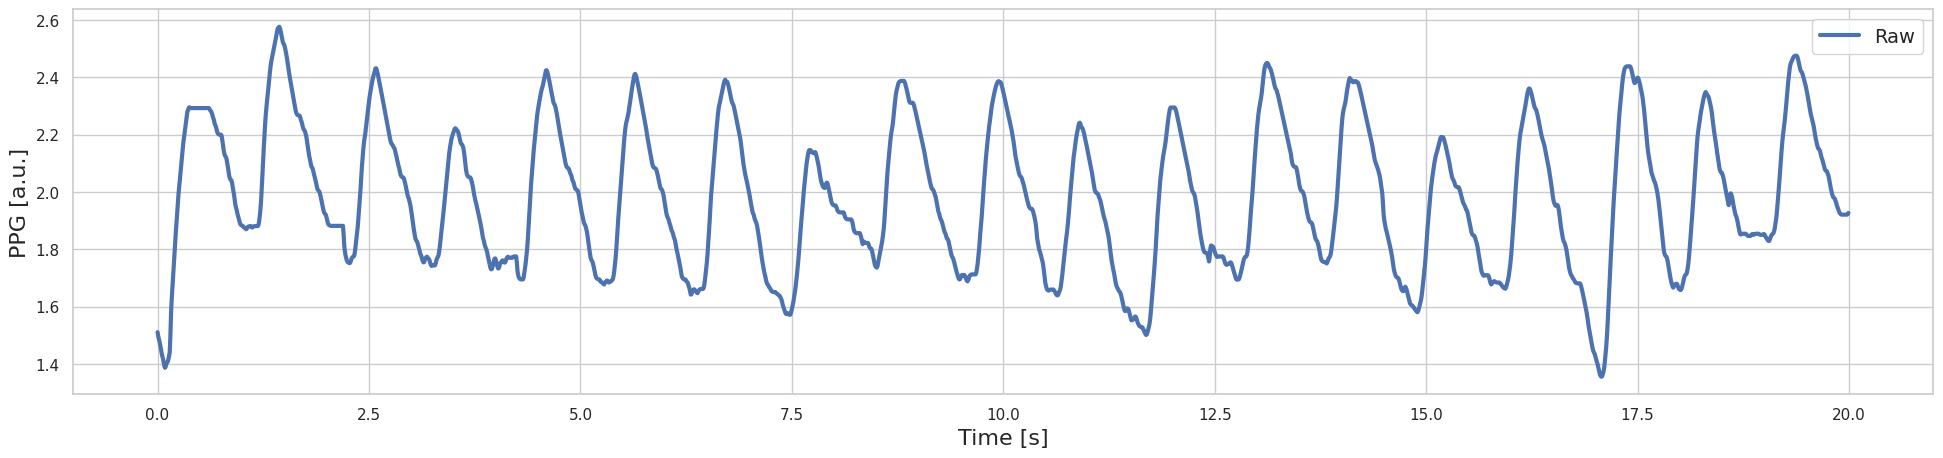

In [62]:
list(figs.values())[0]